# I.Statsmodels
## I.1 Statsmodel. Ordinary Least Squares

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
plt.style.use('ggplot')

In [3]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x,x**3))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

X = sm.add_constant(X)
y = np.dot(X, beta) + e

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.898e+08
Date:                Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                        18:46:22   Log-Likelihood:                -143.33
No. Observations:                 100   AIC:                             292.7
Df Residuals:                      97   BIC:                             300.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2181      0.271      4.502      0.0

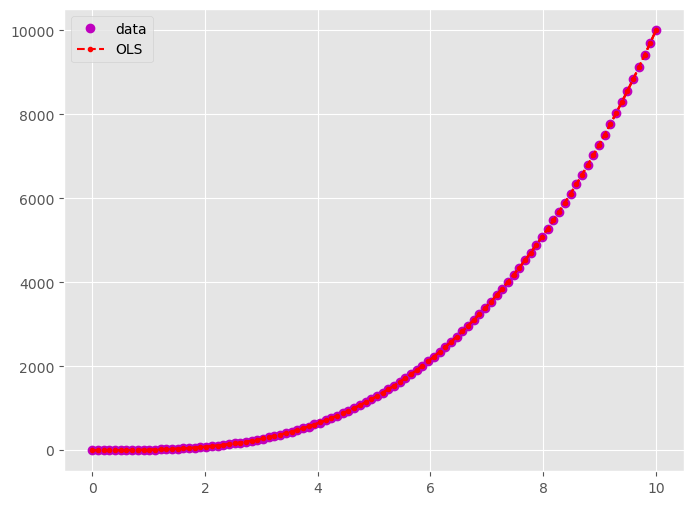

In [4]:
pred_ols = results.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, y, "o", label="data", c='m')
#ax.plot(x, y, "b-", label="True")
ax.plot(x, results.fittedvalues, "r--.", label="OLS")
ax.plot(x, iv_u, "r--")
ax.plot(x, iv_l, "r--")
ax.legend(loc="best")

### Нелинейный случай

In [5]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x - 5) ** 2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.0]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

In [6]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     204.0
Date:                Sun, 12 May 2024   Prob (F-statistic):           1.40e-26
Time:                        18:46:37   Log-Likelihood:                -38.450
No. Observations:                  50   AIC:                             84.90
Df Residuals:                      46   BIC:                             92.55
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5135      0.029     17.948      0.0

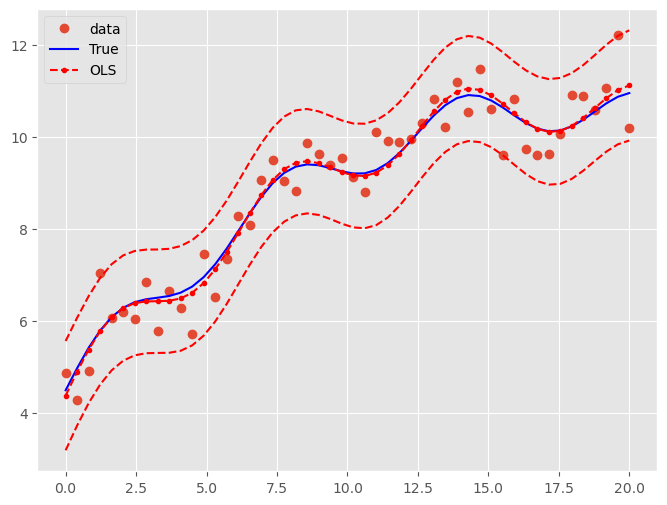

In [7]:
pred_ols = res.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, y, "o", label="data")
ax.plot(x, y_true, "b-", label="True")
ax.plot(x, res.fittedvalues, "r--.", label="OLS")
ax.plot(x, iv_u, "r--")
ax.plot(x, iv_l, "r--")
ax.legend(loc="best")

## I.2 Фильтр Ходрика-Прескотта
<img src="HPF.PNG">

In [8]:
dta = sm.datasets.macrodata.load_pandas().data
index = pd.Index(sm.tsa.datetools.dates_from_range("1959Q1", "2009Q3"))
dta.index = index
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(dta.realgdp)

In [9]:
dta

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008-12-31,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009-03-31,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009-06-30,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


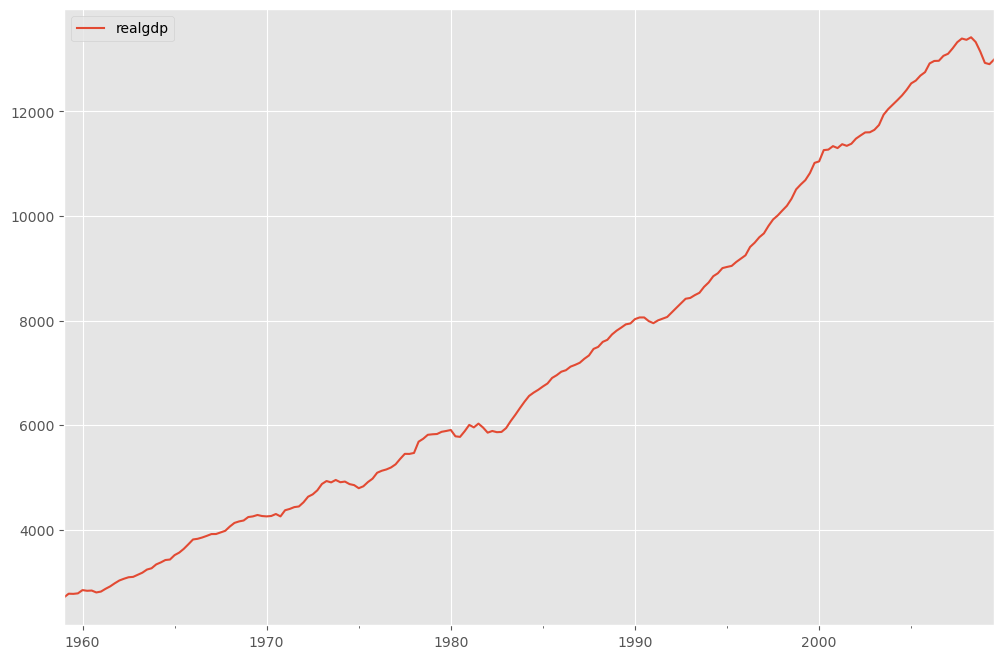

In [10]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
dta.realgdp.plot(ax=ax)
legend = ax.legend(loc="upper left")
legend.prop.set_size(20)

In [11]:
gdp_decomp = dta[["realgdp"]].copy()
gdp_decomp["cycle"] = gdp_cycle
gdp_decomp["trend"] = gdp_trend

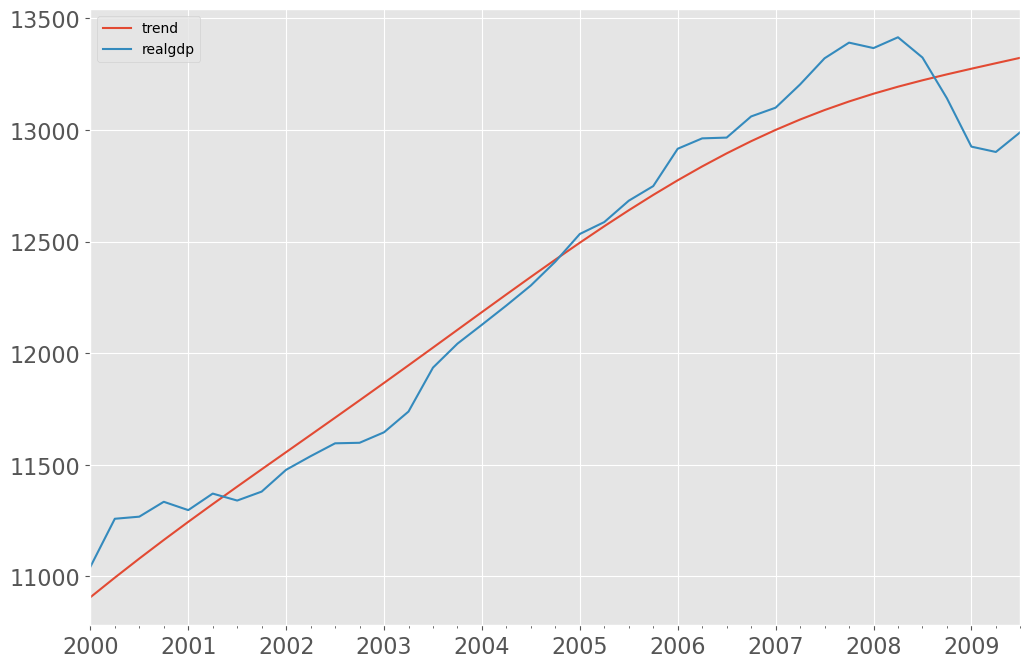

In [12]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
gdp_decomp[["trend", "realgdp"]]["2000-03-31":].plot(ax=ax, fontsize=16)
legend = ax.get_legend()
legend.prop.set_size(20)

In [13]:
gdp_decomp['sum'] = gdp_decomp.cycle + gdp_decomp.trend

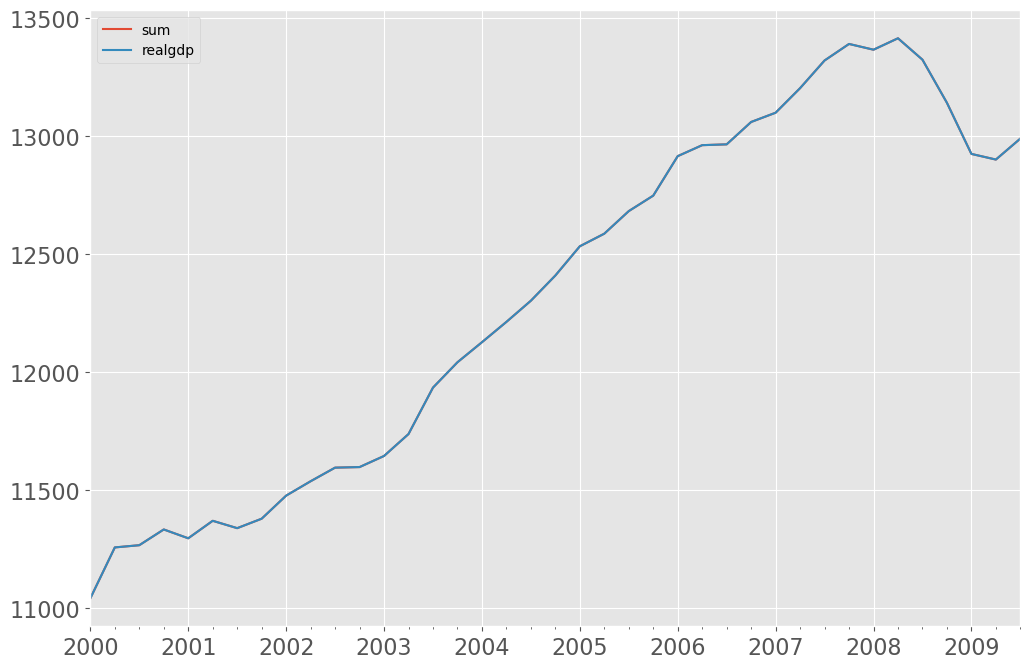

In [14]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
gdp_decomp[["sum", "realgdp"]]["2000-03-31":].plot(ax=ax, fontsize=16)
legend = ax.get_legend()
legend.prop.set_size(20)

# II. Статистическая Модель для обработки текстов

## По набору отзывов о фильмах с известной бинарной оценкой 0/1 (понравился/не понравился) провести предсказание оценок новых отзывов, проведя частотный анализ встречаемости слов в положительных и отрицательных отзывах  

<img src="../../MFK_project/sem/imdb.jpg">

In [15]:
train_texts =[]
train_labels = []

test_texts =[]
test_labels = []


fp_train_texts = open('../../MFK_project/FILIMDB/train.texts','r',encoding='utf-8')
for text in fp_train_texts:
    train_texts.append(text)
    
fp_train_labels = open('../../MFK_project/FILIMDB/train.labels','r',encoding='utf-8')
for label in fp_train_labels:
    train_labels.append(label)
    
fp_test_texts = open('../../MFK_project/FILIMDB/dev.texts','r',encoding='utf-8')
for text in fp_test_texts:
    test_texts.append(text)
    
fp_test_labels = open('../../MFK_project/FILIMDB/dev.labels','r',encoding='utf-8')
for label in fp_test_labels:
    test_labels.append(label)
    
    
print('Длина тренировочного набора текстов: ', len(train_texts))
print('Длина тестового набора текстов: ',len(test_texts))

FileNotFoundError: [Errno 2] No such file or directory: '../../MFK_project/FILIMDB/train.texts'

**Задача, с которой мы столкнулись, называется задачей *бинарной классификации*: классификация, потому что нам нужно классифицировать имеющиеся у нас объекты (тексты), а бинарная, потому что мы имеем всего два класса - отрицательный и положительный.**

Мы уже знаем приемы, которые позволят нам сделать простейшую модель для решения этой задачи. Предлагается следующий метод ее решения:

- Составим словарь предобработанных слов из нашей **коллекции текстов** (в обработке естественного языка термин "коллекция"  наиболее часто применяется для обозначения набора текстов)
- Каждому слову из словаря припишем вероятность встретить его в негативном или позитивном тексте, посчитав сколько раз мы видели это слово там и там
- Посчитаем **априорную вероятнность** встретить текст каждого класса (то есть какое в целом соотношение между позитивными и негативными отзывами)
- Придумаем способ, как зная вероятность "негативности" или "позитивности" каждого слова в тексте сделать вывод о том, какова вероятность "негативности" или "позитивности" нашего текста в целом
- Классифицируем новые тексты и проверим качество

Если кратко резюмировать идею, то она состоит в том, что для определения негативного или позитивного текста мы смотрим, сколько "плохих" (отвратительный, ужасный, примитивный, банальный, клише, пародия, плагиат и тд.) или "хороших" (восхитительный, шедевральный, хорошый, оскар, удовольствие и тд.) мы в нем встретили

Итак, поехали!

In [3]:
# Здесь мы создадим функцию предобработки текстов. Это самый стандартный сппособ предобработки, однако,
# технологии непосредственной обработки текстов не входят в наш курс, и это задание стоит рассматривать,
# как задание на частотный анализ. Будем считать, что нам дана некоторая "волшебная" функция preprocess,
# которая делает предобработку текстов на том уровне, который нам нужен
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

first_preprocessing = lambda text: text.replace('\n',' ').replace('«','').replace('»','').replace('.',' ').replace(';','').replace('-','').replace('—',' ').replace('!',' ').replace(',',' ').replace('  ',' ').replace('   ',' ').lower()
tokenize_n_lemmatize = lambda text: [lemmatizer.lemmatize(t) for t in first_preprocessing(text).split()]

def preprocess(text):
    tokenized_text = tokenize_n_lemmatize(text)
    while '' in tokenized_text:
          tokenized_text.remove('')
    return tokenized_text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sergei\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
text = 'A telephone is a telecommunications device that permits two or more users to conduct a conversation when they are too far apart to be heard directly. A telephone converts sound, typically and most efficiently the human voice, into electronic signals that are transmitted via cables and other communication channels to another telephone which reproduces the sound to the receiving user.'
text

'A telephone is a telecommunications device that permits two or more users to conduct a conversation when they are too far apart to be heard directly. A telephone converts sound, typically and most efficiently the human voice, into electronic signals that are transmitted via cables and other communication channels to another telephone which reproduces the sound to the receiving user.'

In [5]:
preprocess(text)

['a',
 'telephone',
 'is',
 'a',
 'telecommunication',
 'device',
 'that',
 'permit',
 'two',
 'or',
 'more',
 'user',
 'to',
 'conduct',
 'a',
 'conversation',
 'when',
 'they',
 'are',
 'too',
 'far',
 'apart',
 'to',
 'be',
 'heard',
 'directly',
 'a',
 'telephone',
 'convert',
 'sound',
 'typically',
 'and',
 'most',
 'efficiently',
 'the',
 'human',
 'voice',
 'into',
 'electronic',
 'signal',
 'that',
 'are',
 'transmitted',
 'via',
 'cable',
 'and',
 'other',
 'communication',
 'channel',
 'to',
 'another',
 'telephone',
 'which',
 'reproduces',
 'the',
 'sound',
 'to',
 'the',
 'receiving',
 'user']

In [6]:
preprocessed_texts = [preprocess(text) for text in train_texts]

In [7]:
vocabulary = set([]) #Задаем словарь как множество

for text in preprocessed_texts: #Заполняем его
    vocab_of_text = set(text)
    vocabulary = vocabulary.union(vocab_of_text)

vocabulary = list(vocabulary) #преобразуем к list

len(vocabulary)

111963

In [8]:
negative_dict = {word:0 for word in vocabulary}
positive_dict = negative_dict.copy()

for i,text in enumerate(preprocessed_texts):
    target = 0 if train_labels[i] == 'neg\n' else 1
    for word in text:
        if target:
            positive_dict[word]+=1
        else:
            negative_dict[word]+=1

In [9]:
negative_dict['inexplicably']

32

In [10]:
positive_dict['inexplicably']

11

<img src="../../MFK_project/sem/N1.PNG">

Каждому слову припишем теперь некоторый "ранг", который определим как $rank(word) = \frac{P-N}{T}$, где P = positive_dict[word], N = negative_dict[word], а T - это число, равное количеству нахождений слова word всего в текстах.

При этом предлагается выкинуть те слова, которые встречаются совсем уж редко. Скажем, что не будем учитывать слова, которые встречаются менее 5 раз.

In [11]:
P = lambda word: positive_dict[word]
N = lambda word: negative_dict[word]
T = lambda word: positive_dict[word] + negative_dict[word]
rank = lambda word: (P(word) - N(word))/(T(word))
rank_dict = { word: 0 if T(word)<5 else rank(word) for word in vocabulary}

In [12]:
import pandas as pd
worcds_char = pd.DataFrame({'positive' : positive_dict, 'negative' : negative_dict, 'rank' : rank_dict})

In [13]:
worcds_char

,positive,negative,rank
confirmation,2,3,-0.2
"""smokey",0,1,0.0
makhmalbaf's,2,1,0.0
eightyfive,0,2,0.0
'whistler',2,0,0.0
...,...,...,...
developer's,1,0,0.0
stillborn,1,3,0.0
(understandably),0,3,0.0
(church,1,0,0.0


In [14]:
worcds_char.describe()

,positive,negative,rank
count,111963.000000,111963.000000,111963.000000
mean,16.200084,15.709118,0.011490
std,508.287884,477.490819,0.221828
min,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000
max,101165.000000,95146.000000,1.000000


In [15]:
worcds_char['occ'] = worcds_char['positive'] + worcds_char['negative']

In [16]:
worcds_char.query('occ >= 5').shape

(24504, 4)

In [18]:
worcds_char.query('occ >= 5').describe()

,positive,negative,rank,occ
count,24504.000000,24504.000000,24504.000000,24504.000000
mean,71.389365,69.219923,0.052500,140.609288
std,1084.717330,1018.884203,0.471904,2100.740502
min,0.000000,0.000000,-1.000000,5.000000
25%,4.000000,3.000000,-0.246696,7.000000
50%,7.000000,6.000000,0.058824,13.000000
75%,18.000000,16.000000,0.333333,35.000000
max,101165.000000,95146.000000,1.000000,196311.000000


### Теперь для анализа новых текстов применим очень простую идею:

Сложим ранги всех слов, присутствующих в текстах и по знаку получившегося выражения будем делать выводы о негативности или позитивности текста в целом. Учтем, что в новых текстах могут встретиться новые слова. Словам, о которых мы еще ничего не знаем, будем давть ранг 0

<img src="../../MFK_project/ranks.PNG">

In [19]:
preprocessed_test_texts = [preprocess(text) for text in test_texts]

In [20]:
rank_new = lambda word: rank(word) if word in vocabulary else 0
decision = lambda text: 1 if sum([rank_new(word) for word in text]) > 0 else 0

In [21]:
decision(preprocessed_test_texts[0])

0

In [22]:
test_texts[0]

"First of all, I have to say I have worked for blockbuster and have seen quite a few movies to the point its tough for me to find something I haven't seen. Taking this into account, I want everyone to know that this movie was by far the worst film ever made, it made me pine for Gigli, My Boss's Daughter, and any other piece of junk you've ever seen. BeLyt must be out of his mind, I've only found one person who liked it and even they couldn't tell me what the movie was about. If you are able to decipher this movie and are able to tell me what it was about you have to either be the writer or a fortune teller because there's any other way a person could figure this crap out.<br /><br />FOR THE LOVE OF G-D STAY AWAY!\n"

In [23]:
test_labels[0] # настоящий ответ

'neg\n'

Посмотрим какую часть из классифицируемых текстов он оценит правильно. Эта метрика называется accuracy

Замечание:
Проверка всех 10000 текстов займет большое время выполнения. Поэтому мы выберем 500 случайных из них и оценим алгоритм на них

In [25]:
import numpy as np

set_of_indexes = np.arange(0,10001,1)
indexes = np.random.choice(set_of_indexes,100, False)
indexes

array([ 894, 1625, 9470, 3762, 8807,  858, 2826, 1458, 7255, 4104, 1092,
       7130, 7034, 6507, 7176, 6939, 7645, 9657,  653, 1074, 1716, 3414,
       5731, 7259,  946, 8966,  767, 8697, 1960,  441, 1603, 2505, 1300,
       4897,  599, 7293, 5849, 6753, 6806, 5812, 4306, 6840, 1541, 4401,
       8476, 6878, 4044, 4004, 9976, 9846, 1050, 6872, 7450, 5807, 7528,
       3769, 2975, 5784, 1971, 6214, 8184, 4874, 4145,  822, 5623,  265,
       9016, 5860, 8199, 3450, 8309, 8690, 8176, 4124, 6997, 6019, 7172,
       4900, 9276, 5396, 5550, 8279, 3260, 6879, 8376, 3773, 6565, 9594,
       9551, 3404, 6961, 8191,  875, 4107, 2762, 7345, 3600, 9914, 4918,
       2264])

In [26]:
texts = [preprocessed_test_texts[j] for j in indexes]

In [27]:
label_to_int = lambda label: 0 if label == 'neg\n' else 1
accuracy  = 0



for i,text in enumerate(texts):
    dec = decision(text)
    label = label_to_int(test_labels[indexes[i]])
    
    if dec == label:
        accuracy+=1
    try:
        print(f'Текст номер {i}: \n Ответ алгоритма: {dec}, метка текста: {label} \nТекущая точность: {accuracy/(i+1)}\n\n')
    except:
        continue

accuracy/=500

Текст номер 0: 
 Ответ алгоритма: 0, метка текста: 0 
Текущая точность: 1.0


Текст номер 1: 
 Ответ алгоритма: 1, метка текста: 0 
Текущая точность: 0.5


Текст номер 2: 
 Ответ алгоритма: 0, метка текста: 0 
Текущая точность: 0.6666666666666666


Текст номер 3: 
 Ответ алгоритма: 1, метка текста: 0 
Текущая точность: 0.5


Текст номер 4: 
 Ответ алгоритма: 0, метка текста: 0 
Текущая точность: 0.6


Текст номер 5: 
 Ответ алгоритма: 0, метка текста: 0 
Текущая точность: 0.6666666666666666


Текст номер 6: 
 Ответ алгоритма: 0, метка текста: 0 
Текущая точность: 0.7142857142857143


Текст номер 7: 
 Ответ алгоритма: 1, метка текста: 1 
Текущая точность: 0.75


Текст номер 8: 
 Ответ алгоритма: 1, метка текста: 0 
Текущая точность: 0.6666666666666666


Текст номер 9: 
 Ответ алгоритма: 0, метка текста: 0 
Текущая точность: 0.7


Текст номер 10: 
 Ответ алгоритма: 0, метка текста: 0 
Текущая точность: 0.7272727272727273


Текст номер 11: 
 Ответ алгоритма: 1, метка текста: 1 
Текущая то

Текст номер 91: 
 Ответ алгоритма: 1, метка текста: 1 
Текущая точность: 0.7934782608695652


Текст номер 92: 
 Ответ алгоритма: 0, метка текста: 0 
Текущая точность: 0.7956989247311828


Текст номер 93: 
 Ответ алгоритма: 1, метка текста: 0 
Текущая точность: 0.7872340425531915


Текст номер 94: 
 Ответ алгоритма: 1, метка текста: 1 
Текущая точность: 0.7894736842105263


Текст номер 95: 
 Ответ алгоритма: 0, метка текста: 0 
Текущая точность: 0.7916666666666666


Текст номер 96: 
 Ответ алгоритма: 1, метка текста: 0 
Текущая точность: 0.7835051546391752


Текст номер 97: 
 Ответ алгоритма: 1, метка текста: 1 
Текущая точность: 0.7857142857142857


Текст номер 98: 
 Ответ алгоритма: 0, метка текста: 0 
Текущая точность: 0.7878787878787878


Текст номер 99: 
 Ответ алгоритма: 0, метка текста: 0 
Текущая точность: 0.79




In [ ]:
accuracy = accuracy/246

In [ ]:
accuracy